In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


## Summary

If you like this kernel then please upvote. If you fork it then definitely upvote. You would spot a number of functions and class to deal with the features & usage of pipeline to accidentally get into data leakage especially during cross validation and grid/randomized search. 

Please leave a comment if you have suggestions, feedback. The model can be defintely improved by smart choices of feature engineering. 


In [2]:
# python version
import sys
assert sys.version_info > (3,5)

# sklearn version
import sklearn
assert sklearn.__version__ > '0.20'

# common imports
import os
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# display visuals in the notebook
%matplotlib inline

# handle internal library warnings
import warnings
warnings.filterwarnings(action='ignore',message='')

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12


## Load the data

In [3]:
house_train_full =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
house_test =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Part 1: Data Exploration

In [4]:
# view all the columns of the dataframe
pd.options.display.max_columns = None

In [5]:
# inspect the first few rows
house_train_full.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
#house_train_full.info()

*There are too many features in the dataset. Efficient approach to check for the missing values would be to define a function to return the percentage of null values in each predictor*

In [7]:
# function to return the percentage of null values in a list of features
def percent_na(feature, df = house_train_full):
    for val in feature:
        return df[feature].isna().sum()/len(df)

*Print the percentage null values of each of the features in the descending order. Below it prints the top 10 features with missing values*

In [8]:
percent_na(list(house_train_full.columns),house_train_full).sort_values(ascending=False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

*Four features have more than 80% missing values and FireplaceQu has close to 50% missing values. Generall quality appears to have the maximum missing values, especially for features which are not very common in all houses, e.g fence, pool.*
* PoolQC - Pool Quality
* MiscFeature - Contains features not covered in other categories
* Alley - Type of alley access
* Fence -  Fence Quality
* FireplaceQu - Fireplace Quality

Lot Frontage has 17% missing values. However it could be a very important predictor for house sale price. 
Rest of the features have nominal (<5%) or no missing values.
 


*Check the distribution of the target value SalePrice in the training set*
*The distribution of the SalePrice is fairly normal with mean around 200,000. 500,000 and above seems to be outliers at first sight. We will check this using the box plot.*


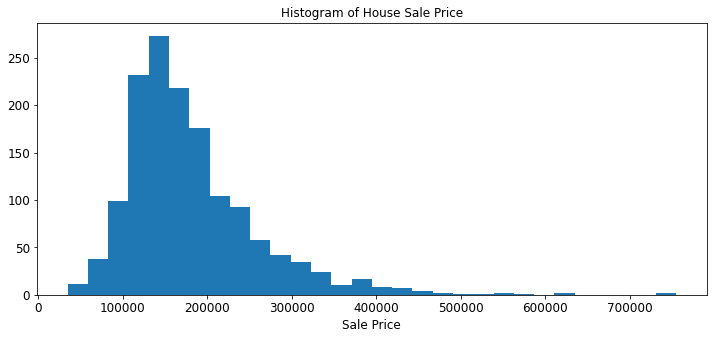

In [9]:
plt.hist(house_train_full['SalePrice'],bins=30)
plt.title('Histogram of House Sale Price')
plt.xlabel('Sale Price');

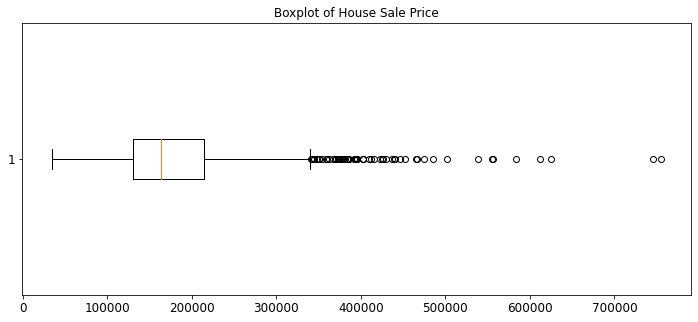

In [10]:
# create boxplot of SalePrice
plt.boxplot(house_train_full['SalePrice'],vert=False)
plt.title('Boxplot of House Sale Price');

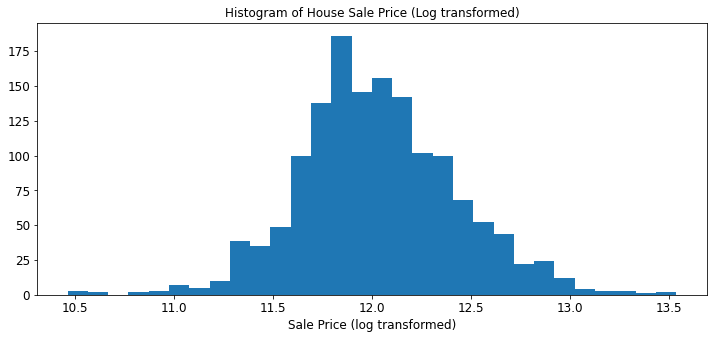

In [11]:
# log transform of the sale price and check the histogram and boxplot
plt.hist(np.log(house_train_full['SalePrice']),bins=30)
plt.title('Histogram of House Sale Price (Log transformed)')
plt.xlabel('Sale Price (log transformed)');

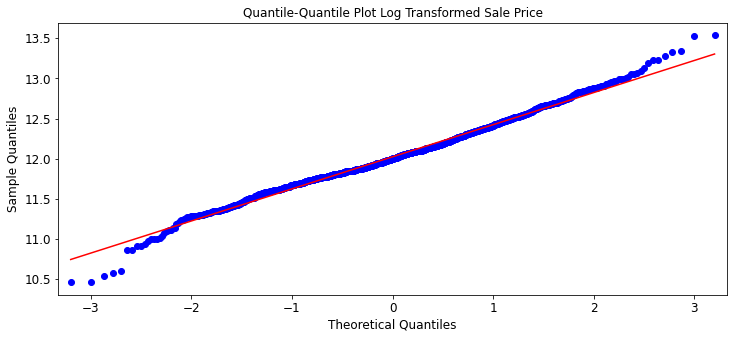

In [12]:
# test for normality of the log transformed sale price
from statsmodels.graphics.gofplots import qqplot

qqplot(np.log(house_train_full['SalePrice']),line='s')
plt.title('Quantile-Quantile Plot Log Transformed Sale Price');

From the Q-Q plot it is clear that the log transformed SalePrice follows normal distribution. Due to outliers, there is a deviation from the normal probability plot. 

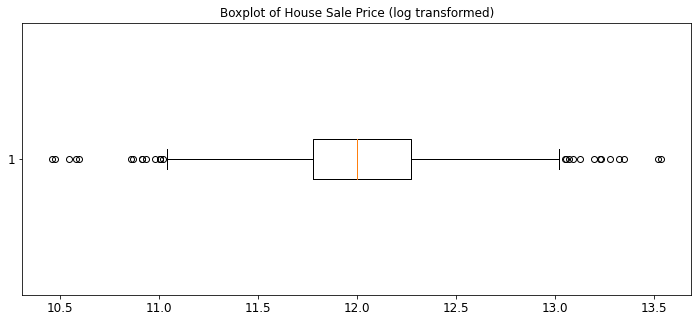

In [13]:
# create boxplot of the log transformed SalePrice
plt.boxplot(np.log(house_train_full['SalePrice']),vert=False)
plt.title('Boxplot of House Sale Price (log transformed)');

In [14]:
# function to return the quantile of the numerical feature
def quantile_num(df,num_feature,quant):
    quantiles = []
    for q in quant:
        quantiles.append(np.quantile(df[num_feature],q))
    return quantiles        

In [15]:
quantile_num(df=house_train_full,num_feature='SalePrice',quant = [0.5,0.75,0.9,0.95,0.99])

[163000.0, 214000.0, 278000.0, 326099.99999999994, 442567.0100000005]

*99th quantile is 442567. 
 95th quantile is 326099. 
I will next check what are the houses above these percentiles.*

In [16]:
house_train_full[house_train_full['SalePrice']>np.quantile(house_train_full['SalePrice'],0.99)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3,858,TA,TA,Y,126,66,0,0,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,201

In [17]:
house_train_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


*Above 700,000 is mentioned as Abnormal Sale condition (trade,foreclosure or short sale) and is the only one with a pool and a fence. The zone of this property is Residential Low Density. 
More information to understand the various attributes is in the data description. So better to read it.*

In [18]:
# uncomment to read the file content

#with  open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt') as file:
 #   file_content = file.read()
  #  print (file_content)

Reading the data description and with a bit of experience, the following categorical features could be important attributes in determining the price of the house. While at this early stage of exploration, it could be all wrong :-)
- Neighborhood
- Proximity to various conditions (Condition 1) ... Condition 2 is also very similar. I will check it next
- MSZoning (zoning classification of the sale , agricultural, high rise etc. ) 
- OverallCond (overall condition of the house)
- MSSubClass (the type of dwelling involved) 

In [19]:
# check the abnormal sales neighborhoods
house_train_full[house_train_full['SaleCondition']=='Abnorml']['Neighborhood'].value_counts().sort_values(ascending=False)

NAmes      23
OldTown    12
Edwards     8
IDOTRR      7
NWAmes      6
Sawyer      5
Somerst     4
SawyerW     4
NoRidge     4
CollgCr     3
BrDale      3
Mitchel     3
Crawfor     3
Timber      3
SWISU       3
BrkSide     3
ClearCr     3
StoneBr     1
MeadowV     1
NPkVill     1
Gilbert     1
Name: Neighborhood, dtype: int64

In [20]:
# check the neighborhood of the houses in sale price above the 99 percentile
house_train_full[house_train_full['SalePrice']>np.quantile(house_train_full['SalePrice'],0.99)]['Neighborhood'].value_counts().sort_values(ascending=False)

NridgHt    7
NoRidge    4
StoneBr    3
OldTown    1
Name: Neighborhood, dtype: int64

A more understanding of the neighborhood can be understood from the map of Ames city. Certain neighborhoods are deemed to be more expensive than the other ones. 

It is very effort intensive to check the value count of each categorical feature one at a time. I will define a function to separate all the categorical features and numerical features and explore them when needed. 

In [21]:
# function to list all the categorical features
def type_features(df,features):
    cat_features = []
    num_features = []
    for feat in features:
        if df[feat].dtype == 'O':
            cat_features.append(feat)
        else:
            num_features.append(feat)
    return (cat_features,num_features)

In [22]:
categorical_features, numerical_features = type_features(house_train_full,house_train_full.columns)
len(categorical_features)

43

There are 43 categorical features in the dataset

**Check the correlation of the numerical features with Sale Price of the house**|

In [23]:
house_train_full.corr()['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [24]:
house_train_full.corr()['SalePrice'].sort_values(ascending=False).tail(15)

BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

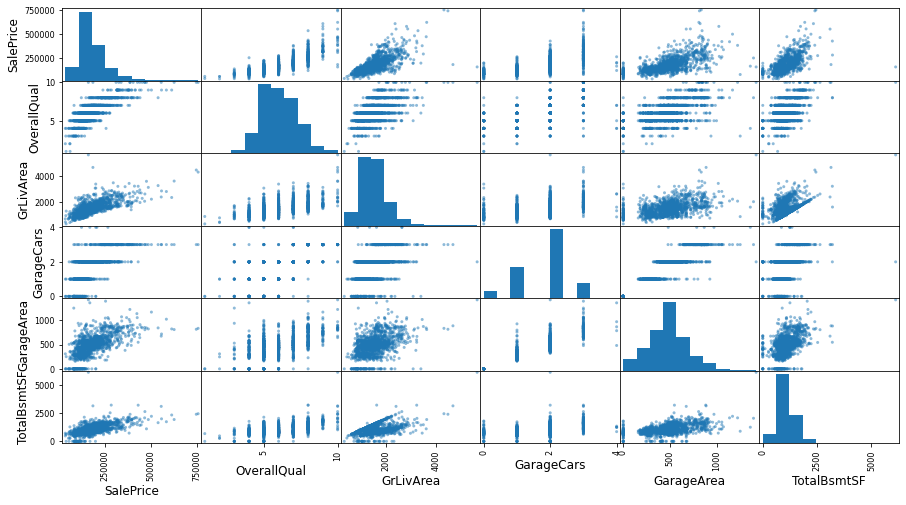

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
scatter_matrix(house_train_full[attributes],figsize=(15,8),grid=True);

*Check the value count of each categorical features*

In [26]:
for features in categorical_features:
    print (house_train_full[features].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

What is interesting is that many of the quality features, for instance BsmtQual (Basement quality) is a categorical feature while the overall quality is a numerical feature. Perhaps good to have all quality labels as categorical.

*Visualize the sale condition - Normal, Abnormal etc. *

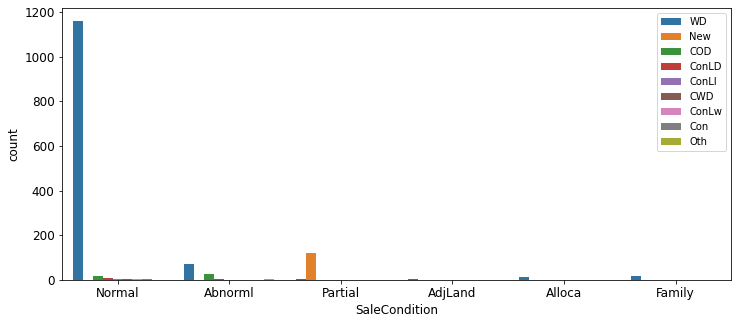

In [27]:
sns.countplot('SaleCondition',hue='SaleType',data=house_train_full)
plt.legend(loc='upper right')

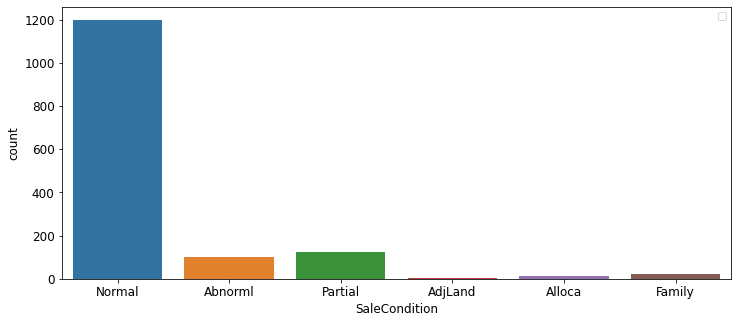

In [28]:
sns.countplot('SaleCondition',data=house_train_full)
plt.legend(loc='upper right')

This is what we have from the sale type
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

There is more clarity when I look at the description of the sale condition
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In order for the model to generalize well, the sample selection for training the model should be the near representative of the data set. Sale condition could be one of the feature to bin the data. However, lets explore the overall quality distribution in the dataset. 

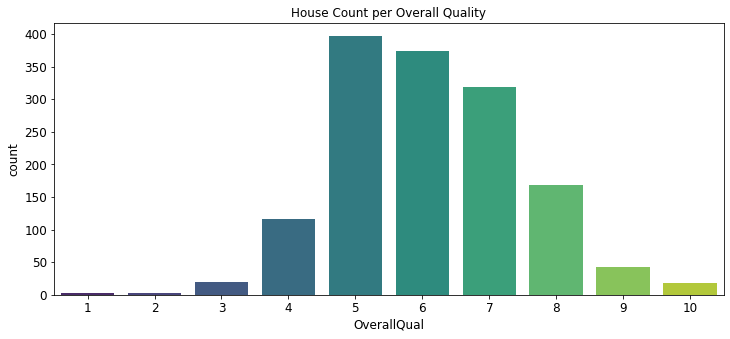

In [29]:
sns.countplot('OverallQual',data=house_train_full,palette='viridis')
plt.title('House Count per Overall Quality');


Wow, this looks more like a bell shaped with maximum overall quality between 4 to 8. Visualize the Sale Price vs the Overall Quality more closely than done in the scatter matrix

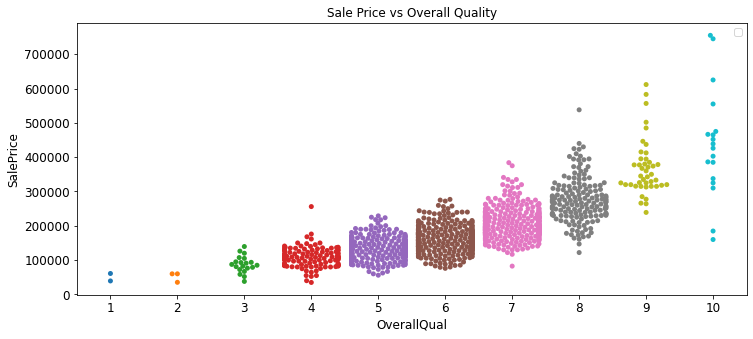

In [30]:
sns.swarmplot('OverallQual','SalePrice',data=house_train_full)
plt.title('Sale Price vs Overall Quality')
plt.legend(loc='upper right');

Things are becoming little clear now.

Most expensive houses, SalePrice above 99 percentile, all have overall quality rating 8 and above. Most expensive house also has the best quality rating. However, there are also a few with 10 rating but with median price range. The least expensive have ratings 1 to 4. There are more sales of houses with the quality rating between 5 to 9. Both 3 and 4 quality rating have houses with median price range. This could be associated with the neighborhood the houses are located.


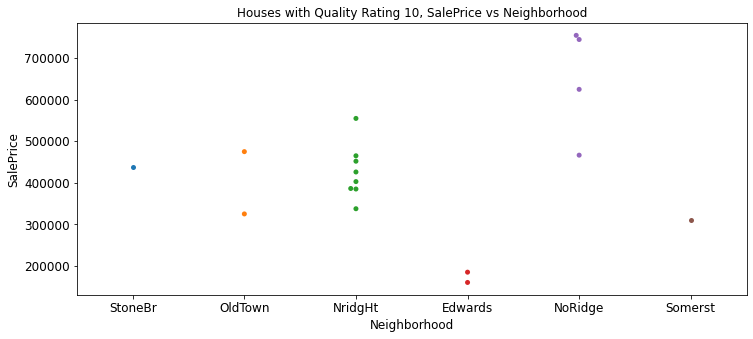

In [31]:
sns.swarmplot('Neighborhood','SalePrice',data=house_train_full[house_train_full['OverallQual']==10])
plt.title('Houses with Quality Rating 10, SalePrice vs Neighborhood');


So, Edwards locality has least expensive housing with highest quality. Would be interesting to check which sale condition these houses fall into ---> new , renovated etc. 

We will leave it at this point. What is clear and is expected to be true for other quality ratings as well that Neighborhood is an important predictor for Sale Price.

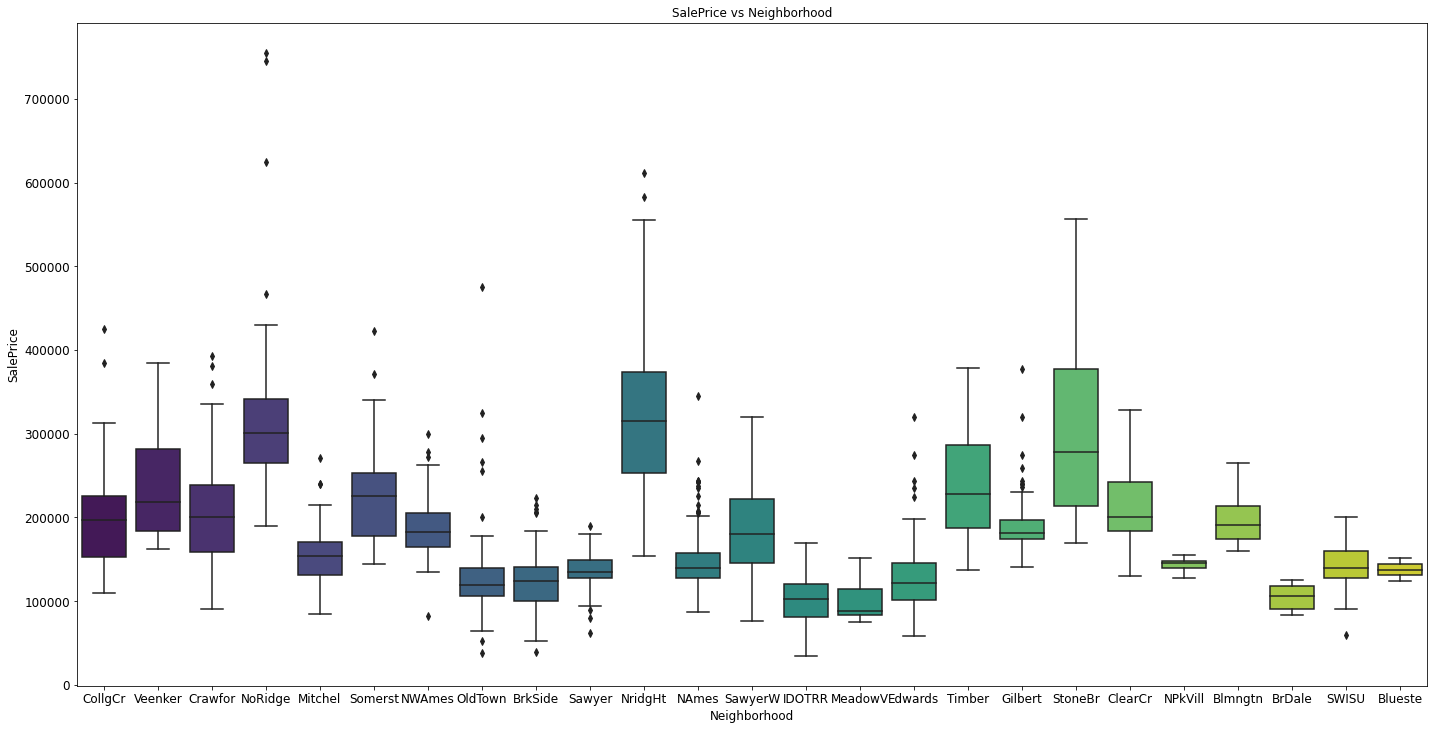

In [32]:
# Boxplot SalePrice vs Neighborhood
plt.figure(figsize=(20,10))
sns.boxplot('Neighborhood','SalePrice',data=house_train_full,palette='viridis')
plt.tight_layout(True)
plt.title('SalePrice vs Neighborhood');

Clearly, neighborhood is a strong predictor of the house price

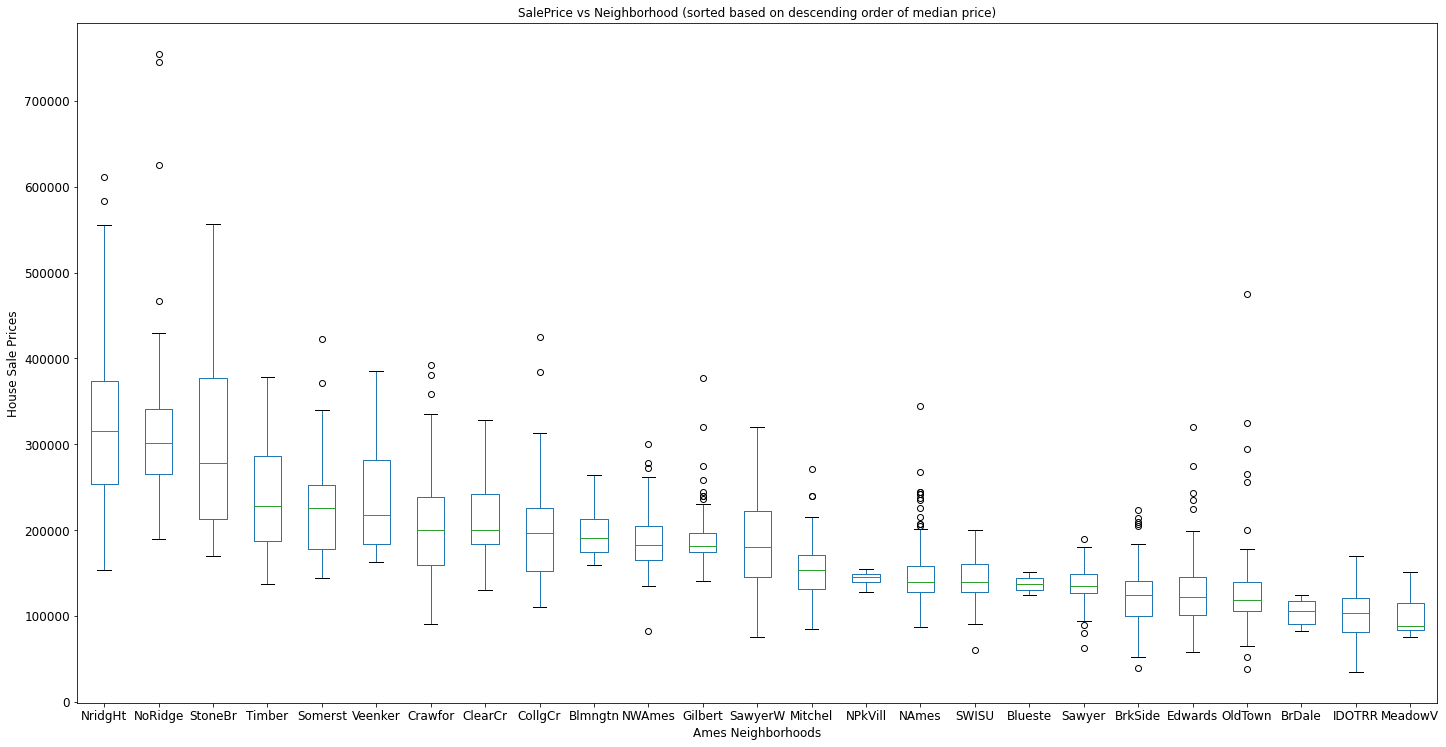

In [33]:
# Visualize the boxplot sorted by median SalePrice and plotted in descending order

# create the sorted dataframe
grouped = house_train_full.groupby(['Neighborhood'])
df = pd.DataFrame({col:vals['SalePrice'] for col,vals in grouped})

meds = df.median()
meds.sort_values(ascending=False, inplace=True)
df = df[meds.index]

# generate boxplot
plt.figure(figsize=(20,10))

df.boxplot(grid=False)

plt.tight_layout(True)
plt.title('SalePrice vs Neighborhood (sorted based on descending order of median price)')
plt.xlabel('Ames Neighborhoods')
plt.ylabel('House Sale Prices');

Now, we see the localities on the x-axis from most expensive to least expensive (left to right) based on the median house price

## Part 2: Data Preparation

In [34]:
#create a copy of the original train set
housing = house_train_full.copy()

In [35]:
# read the categorical and the numerical features
categorical_features, numerical_features = type_features(housing,housing.columns)
len(categorical_features)

43

In [36]:
percent_na(list(housing.columns),housing).sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

In [37]:
# drop list of columns
drop_list_1 = ['Id','PoolQC','MiscFeature','Alley','Fence']

In [38]:
# function to drop the columns
def drop_feature(df,drop_list):
    for feature in drop_list:
        df.drop(feature,axis=1,inplace=True)
    return df

In [39]:
save_id = house_test.copy()

In [40]:
# drop the features from the training set and the test set
drop_feature(housing,drop_list_1)
drop_feature(house_test,drop_list_1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [41]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [42]:
#update the feature list
categorical_features, numerical_features = type_features(housing,housing.columns)
len(categorical_features)

39

OverallQual is a strong predictor of the housing price. It takes the integer values from 1 to 10. It is better to convert this feature into a categorical column.

In [43]:
num_to_cat_list = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

In [44]:
#convert the selected numerical features to categorical
def to_category(df,num_list):
    for feature in num_list:
        df[feature] = df[feature].astype('str')
    return df

In [45]:
to_category(housing,num_to_cat_list)
to_category(house_test,num_to_cat_list)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,nan,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,nan,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [46]:
# update the categorical and the numerical feature list
categorical_features,numerical_features = type_features(housing,housing.columns)
len(categorical_features)

47

In [47]:
housing['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In order that the model sees the houses of various quality, I would use Stratified split on the housing dataset into train and validation test set. 

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for train_index,valid_index in strat_split.split(housing,housing['OverallQual']):
    strat_house_train = housing.loc[train_index]
    strat_house_valid = housing.loc[valid_index]


In [49]:
len(strat_house_train)

1168

In [50]:
strat_house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
972,120,RL,55.0,7892,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,918,918,GasA,TA,Y,SBrkr,918,0,0,918,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1979.0,Unf,1,264,TA,TA,Y,28,0,0,0,0,0,0,4,2010,WD,Normal,99500
766,60,RL,80.0,10421,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,42.0,TA,TA,CBlock,Gd,TA,No,GLQ,394,Unf,0,586,980,GasA,TA,Y,SBrkr,980,734,0,1714,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1988.0,Unf,2,496,TA,TA,Y,228,66,156,0,0,0,500,3,2010,WD,Normal,196500
958,20,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,699,Unf,0,638,1337,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2003.0,RFn,2,531,TA,TA,Y,0,39,0,0,0,0,0,10,2007,WD,Normal,185000
1197,75,RM,65.0,8850,Pave,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,815,815,GasA,Ex,Y,SBrkr,815,875,0,1690,0,0,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1916.0,Unf,1,225,TA,TA,Y,0,0,330,0,0,0,0,7,2006,ConLw,Normal,144000
1004,120,RL,43.0,3182,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,1,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,457,TA,TA,Y,156,0,0,0,0,0,0,5,2009,WD,Normal,181000


In [51]:
# separate the SalePrice, the final label to be predicted
X_train = strat_house_train.drop('SalePrice',axis=1)
#evaluation is based on the log transformed value of the SalePrice
y_train = np.log(strat_house_train['SalePrice'])

X_valid = strat_house_valid.drop('SalePrice',axis=1)
y_valid = np.log(strat_house_valid['SalePrice'])

X_test = house_test.copy()


Preparation step sequence
- create a numerical feature dataset 
- impute the missing values 
- apply transformation on the selected features
- scale the features


In [52]:
# reapply the function to extract the categorical and the numeric features
categorical_features,numerical_features = type_features(X_train,X_train.columns)

In [53]:
X_train_num = X_train[numerical_features]
X_train_num.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
972,55.0,7892,0.0,0,0,918,918,918,0,0,918,0,0,2,0,2,1,5,1,1,264,28,0,0,0,0,0,0
766,80.0,10421,42.0,394,0,586,980,980,734,0,1714,0,0,2,1,3,1,7,1,2,496,228,66,156,0,0,0,500
958,65.0,8450,0.0,699,0,638,1337,1337,0,0,1337,1,0,2,0,3,1,6,0,2,531,0,39,0,0,0,0,0
1197,65.0,8850,0.0,0,0,815,815,815,875,0,1690,0,0,1,0,3,1,7,1,1,225,0,0,330,0,0,0,0
1004,43.0,3182,16.0,16,0,1330,1346,1504,0,0,1504,0,0,2,0,1,1,7,1,2,457,156,0,0,0,0,0,0


In [54]:
X_train_cat = X_train[categorical_features]
X_train_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
972,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,1979.0,Unf,TA,TA,Y,4,2010,WD,Normal
766,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,1988.0,Unf,TA,TA,Y,3,2010,WD,Normal
958,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,10,2007,WD,Normal
1197,75,RM,Pave,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,1916.0,Unf,TA,TA,Y,7,2006,ConLw,Normal
1004,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,2005.0,Fin,TA,TA,Y,5,2009,WD,Normal


lets deal with the numerical dataset first. I would define a pipeline and apply all the steps on the validation dataset

In [55]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [56]:
imputer = KNNImputer()
X_train_num_imp = imputer.fit_transform(X_train_num)

Create a custom transformer to log transform the entire numerical features


In [57]:
scalar = StandardScaler()
X_train_num_prep = scalar.fit_transform(X_train_num_imp)

In [58]:
X_train_num_prep

array([[-0.67018544, -0.25656821, -0.57929754, ..., -0.27314075,
        -0.06476028, -0.08773149],
       [ 0.34001572, -0.01889995, -0.34732393, ..., -0.27314075,
        -0.06476028,  0.82467347],
       [-0.26610497, -0.20412895, -0.57929754, ..., -0.27314075,
        -0.06476028, -0.08773149],
       ...,
       [-0.30651302, -0.01382518, -0.18162849, ..., -0.27314075,
        -0.06476028, -0.08773149],
       [ 1.14817664,  0.21585502,  3.61832018, ..., -0.27314075,
        -0.06476028, -0.08773149],
       [-0.48430842, -0.26991297, -0.57929754, ..., -0.27314075,
        -0.06476028, -0.08773149]])

In [59]:
# Reconstruct the numerical features dataframe
X_train_num_prepared = pd.DataFrame(X_train_num_prep,
                                   columns=list(X_train_num.columns),index=X_train_num.index)
X_train_num_prepared.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
972,-0.670185,-0.256568,-0.579298,-0.977875,-0.293751,0.822634,-0.315836,-0.640162,-0.796672,-0.12802,-1.170325,-0.832856,-0.247102,0.809306,-0.760311,-1.044934,-0.203898,-0.934998,0.593574,-1.027848,-0.981346,-0.524672,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731
766,0.340016,-0.018900,-0.347324,-0.123500,-0.293751,0.065569,-0.174459,-0.477192,0.910255,-0.12802,0.401163,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,0.295512,0.593574,0.316527,0.123331,1.045043,0.318631,2.163017,-0.119992,-0.273141,-0.06476,0.824673
958,-0.266105,-0.204129,-0.579298,0.537881,-0.293751,0.184145,0.639594,0.461200,-0.796672,-0.12802,-0.343122,1.067097,-0.247102,0.809306,-0.760311,0.176771,-0.203898,-0.319743,-0.974965,0.316527,0.289985,-0.744432,-0.107327,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731
1197,-0.266105,-0.166538,-0.579298,-0.977875,-0.293751,0.587762,-0.550703,-0.910903,1.238153,-0.12802,0.353781,-0.832856,-0.247102,-1.022612,-0.760311,0.176771,-0.203898,0.295512,0.593574,-1.027848,-1.167046,-0.744432,-0.722600,4.970868,-0.119992,-0.273141,-0.06476,-0.087731
1004,-1.155082,-0.699201,-0.490927,-0.943180,-0.293751,1.762125,0.660116,0.900168,-0.796672,-0.12802,-0.013426,-0.832856,-0.247102,0.809306,-0.760311,-2.266638,-0.203898,0.295512,0.593574,0.316527,-0.062369,0.479946,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731


Create a pipeline for the numerical features. The pipeline would be used to transform the validation & test set 

In [60]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('num_imputer',KNNImputer()),
                         ('std_scalar',StandardScaler()),
                         ])

In [61]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [62]:
hot_encoder = OneHotEncoder(sparse=False)
ord_encoder = OrdinalEncoder()

before we can impute the missing values in the categorical feature set, the non missing values should be encoded

In [63]:
# define a function to apply one hot encoder and then impute the missing values
def encode(df):
    # keep only the non null values 
    arr = np.array(df.dropna())
    # reshape the data for encoding
    arr_reshape = arr.reshape(-1,1)
    # encode the data
    arr_encoded = ord_encoder.fit_transform(arr_reshape)
    # bring the encoded data back to the df
    df.loc[df.notnull()] = np.squeeze(arr_encoded)
    return df


In [64]:
for cat_feature in categorical_features:    
    encode(X_train_cat[cat_feature])

In [65]:
X_train_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
972,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,4.0,2.0,6.0,4.0,77.0,29.0,1.0,1.0,7.0,8.0,2,3.0,4.0,1.0,2,3,3,5,5,0.0,4.0,1.0,4.0,3.0,6.0,4,1,63.0,2,4,4,2.0,6.0,4.0,8.0,4.0
766,9.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,5.0,7.0,4.0,86.0,38.0,1.0,1.0,4.0,5.0,1,3.0,4.0,1.0,2,3,3,2,5,0.0,4.0,1.0,4.0,3.0,6.0,4,1,72.0,2,4,4,2.0,5.0,4.0,8.0,4.0
958,4.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,7.0,4.0,101.0,53.0,1.0,1.0,10.0,11.0,2,2.0,4.0,2.0,2,3,2,2,5,0.0,0.0,1.0,4.0,2.0,6.0,NaN,1,87.0,1,4,4,2.0,1.0,1.0,8.0,4.0
1197,11.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,2.0,0.0,4.0,7.0,5.0,18.0,0.0,1.0,1.0,6.0,7.0,2,3.0,4.0,0.0,3,3,3,5,5,0.0,0.0,1.0,4.0,3.0,6.0,2,5,5.0,2,4,4,2.0,9.0,0.0,5.0,4.0
1004,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,2.0,7.0,4.0,103.0,56.0,1.0,1.0,10.0,11.0,1,2.0,4.0,2.0,2,3,3,2,5,0.0,0.0,1.0,4.0,2.0,6.0,2,1,89.0,0,4,4,2.0,7.0,3.0,8.0,4.0


Now we can use the KNN imputer on the missing values in the categorical dataset

In [66]:
cat_imputer = KNNImputer()
X_train_cat_imp = cat_imputer.fit_transform(X_train_cat)

Construct the dataframe with the categorical features

In [67]:
# Reconstruct the categorical features dataframe
X_train_cat_prepared = pd.DataFrame(X_train_cat_imp,
                                   columns=list(X_train_cat.columns),index=X_train_cat.index)
X_train_cat_prepared.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
972,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,4.0,2.0,6.0,4.0,77.0,29.0,1.0,1.0,7.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,5.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,63.0,2.0,4.0,4.0,2.0,6.0,4.0,8.0,4.0
766,9.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,5.0,7.0,4.0,86.0,38.0,1.0,1.0,4.0,5.0,1.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,72.0,2.0,4.0,4.0,2.0,5.0,4.0,8.0,4.0
958,4.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,7.0,4.0,101.0,53.0,1.0,1.0,10.0,11.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.8,1.0,87.0,1.0,4.0,4.0,2.0,1.0,1.0,8.0,4.0
1197,11.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,2.0,0.0,4.0,7.0,5.0,18.0,0.0,1.0,1.0,6.0,7.0,2.0,3.0,4.0,0.0,3.0,3.0,3.0,5.0,5.0,0.0,0.0,1.0,4.0,3.0,6.0,2.0,5.0,5.0,2.0,4.0,4.0,2.0,9.0,0.0,5.0,4.0
1004,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,2.0,7.0,4.0,103.0,56.0,1.0,1.0,10.0,11.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,89.0,0.0,4.0,4.0,2.0,7.0,3.0,8.0,4.0


In [68]:
#np.max(X_train_cat_prepared)

Pipeline to deal with the categorical 

In [69]:
cat_pipeline = Pipeline([('cat_imputer',cat_imputer),
                         ('cat_std_sclar',StandardScaler())])

create a full pipeline for the numerical and categorical features combined. for ithis we will make use of the ColumnTransfomer from Sci-kit learn compose package available in version 0.2 and above

In [70]:
from sklearn.compose import ColumnTransformer

num_attribs = numerical_features
cat_attribs = categorical_features

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',cat_pipeline,cat_attribs),
])

Summary of the data preparation step applied on the training data 
- train dataset was split into two dataset containing the numerical and categorical features
- the numerical dataset was imputed first using KNN and then standard scalar was applied 
- the categorical dataset was first encoded using the custom encode function and then imputed using KNN

In [71]:
X_train_num_prepared.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
972,-0.670185,-0.256568,-0.579298,-0.977875,-0.293751,0.822634,-0.315836,-0.640162,-0.796672,-0.12802,-1.170325,-0.832856,-0.247102,0.809306,-0.760311,-1.044934,-0.203898,-0.934998,0.593574,-1.027848,-0.981346,-0.524672,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731
766,0.340016,-0.018900,-0.347324,-0.123500,-0.293751,0.065569,-0.174459,-0.477192,0.910255,-0.12802,0.401163,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,0.295512,0.593574,0.316527,0.123331,1.045043,0.318631,2.163017,-0.119992,-0.273141,-0.06476,0.824673
958,-0.266105,-0.204129,-0.579298,0.537881,-0.293751,0.184145,0.639594,0.461200,-0.796672,-0.12802,-0.343122,1.067097,-0.247102,0.809306,-0.760311,0.176771,-0.203898,-0.319743,-0.974965,0.316527,0.289985,-0.744432,-0.107327,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731
1197,-0.266105,-0.166538,-0.579298,-0.977875,-0.293751,0.587762,-0.550703,-0.910903,1.238153,-0.12802,0.353781,-0.832856,-0.247102,-1.022612,-0.760311,0.176771,-0.203898,0.295512,0.593574,-1.027848,-1.167046,-0.744432,-0.722600,4.970868,-0.119992,-0.273141,-0.06476,-0.087731
1004,-1.155082,-0.699201,-0.490927,-0.943180,-0.293751,1.762125,0.660116,0.900168,-0.796672,-0.12802,-0.013426,-0.832856,-0.247102,0.809306,-0.760311,-2.266638,-0.203898,0.295512,0.593574,0.316527,-0.062369,0.479946,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731


In [72]:
X_train_cat_prepared.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
972,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,4.0,2.0,6.0,4.0,77.0,29.0,1.0,1.0,7.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,5.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,63.0,2.0,4.0,4.0,2.0,6.0,4.0,8.0,4.0
766,9.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,5.0,7.0,4.0,86.0,38.0,1.0,1.0,4.0,5.0,1.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,72.0,2.0,4.0,4.0,2.0,5.0,4.0,8.0,4.0
958,4.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,7.0,4.0,101.0,53.0,1.0,1.0,10.0,11.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.8,1.0,87.0,1.0,4.0,4.0,2.0,1.0,1.0,8.0,4.0
1197,11.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,2.0,0.0,4.0,7.0,5.0,18.0,0.0,1.0,1.0,6.0,7.0,2.0,3.0,4.0,0.0,3.0,3.0,3.0,5.0,5.0,0.0,0.0,1.0,4.0,3.0,6.0,2.0,5.0,5.0,2.0,4.0,4.0,2.0,9.0,0.0,5.0,4.0
1004,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,2.0,7.0,4.0,103.0,56.0,1.0,1.0,10.0,11.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,89.0,0.0,4.0,4.0,2.0,7.0,3.0,8.0,4.0


In [73]:
X_train_prepared = pd.concat([X_train_num_prepared,X_train_cat_prepared],axis=1)

In [74]:
X_train_prepared.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
972,-0.670185,-0.256568,-0.579298,-0.977875,-0.293751,0.822634,-0.315836,-0.640162,-0.796672,-0.12802,-1.170325,-0.832856,-0.247102,0.809306,-0.760311,-1.044934,-0.203898,-0.934998,0.593574,-1.027848,-0.981346,-0.524672,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,4.0,2.0,6.0,4.0,77.0,29.0,1.0,1.0,7.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,5.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,63.0,2.0,4.0,4.0,2.0,6.0,4.0,8.0,4.0
766,0.340016,-0.018900,-0.347324,-0.123500,-0.293751,0.065569,-0.174459,-0.477192,0.910255,-0.12802,0.401163,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,0.295512,0.593574,0.316527,0.123331,1.045043,0.318631,2.163017,-0.119992,-0.273141,-0.06476,0.824673,9.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,5.0,7.0,4.0,86.0,38.0,1.0,1.0,4.0,5.0,1.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,5.0,0.0,4.0,1.0,4.0,3.0,6.0,4.0,1.0,72.0,2.0,4.0,4.0,2.0,5.0,4.0,8.0,4.0
958,-0.266105,-0.204129,-0.579298,0.537881,-0.293751,0.184145,0.639594,0.461200,-0.796672,-0.12802,-0.343122,1.067097,-0.247102,0.809306,-0.760311,0.176771,-0.203898,-0.319743,-0.974965,0.316527,0.289985,-0.744432,-0.107327,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,4.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,7.0,4.0,101.0,53.0,1.0,1.0,10.0,11.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.8,1.0,87.0,1.0,4.0,4.0,2.0,1.0,1.0,8.0,4.0
1197,-0.266105,-0.166538,-0.579298,-0.977875,-0.293751,0.587762,-0.550703,-0.910903,1.238153,-0.12802,0.353781,-0.832856,-0.247102,-1.022612,-0.760311,0.176771,-0.203898,0.295512,0.593574,-1.027848,-1.167046,-0.744432,-0.722600,4.970868,-0.119992,-0.273141,-0.06476,-0.087731,11.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,2.0,0.0,4.0,7.0,5.0,18.0,0.0,1.0,1.0,6.0,7.0,2.0,3.0,4.0,0.0,3.0,3.0,3.0,5.0,5.0,0.0,0.0,1.0,4.0,3.0,6.0,2.0,5.0,5.0,2.0,4.0,4.0,2.0,9.0,0.0,5.0,4.0
1004,-1.155082,-0.699201,-0.490927,-0.943180,-0.293751,1.762125,0.660116,0.900168,-0.796672,-0.12802,-0.013426,-0.832856,-0.247102,0.809306,-0.760311,-2.266638,-0.203898,0.295512,0.593574,0.316527,-0.062369,0.479946,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,0.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,2.0,2.0,4.0,2.0,7.0,4.0,103.0,56.0,1.0,1.0,10.0,11.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,89.0,0.0,4.0,4.0,2.0,7.0,3.0,8.0,4.0


In [75]:
X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features]

for cat_feature in categorical_features:
    encode(X_train_cat[cat_feature])
    
warnings.filterwarnings(action='ignore',message='')    

X_train_num_prep = num_pipeline.fit_transform(X_train_num)
X_train_num_prepared = pd.DataFrame(X_train_num_prep,
                                   columns=list(X_train_num.columns),index=X_train_num.index)

X_train_cat_imp = cat_pipeline.fit_transform(X_train_cat)
X_train_cat_prepared = pd.DataFrame(X_train_cat_imp,
                                    columns=list(X_train_cat.columns),index=X_train_cat.index)

X_train_prepared = pd.concat([X_train_num_prepared,X_train_cat_prepared],axis=1)

### Prepare the validation dataset 

In [76]:
X_valid_num = X_valid[numerical_features]
X_valid_cat = X_valid[categorical_features]

for cat_feature in categorical_features:
    encode(X_valid_cat[cat_feature])
    
X_valid_num_prep = num_pipeline.transform(X_valid_num)
X_valid_num_prepared = pd.DataFrame(X_valid_num_prep,
                                   columns=list(X_valid_num.columns),index=X_valid_num.index)

X_valid_cat_imp = cat_pipeline.transform(X_valid_cat)
X_valid_cat_prepared = pd.DataFrame(X_valid_cat_imp,
                                    columns=list(X_valid_cat.columns),index=X_valid_cat.index)

X_valid_prepared = pd.concat([X_valid_num_prepared,X_valid_cat_prepared],axis=1)

In [77]:
X_valid_prepared.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
158,1.148177,0.181365,-0.579298,-0.496476,-0.293751,0.482867,-0.149377,-0.448278,1.426519,-0.12802,0.861158,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,0.910767,0.593574,0.316527,0.989931,-0.744432,1.422968,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,0.504261,-3.318368,0.058621,0.756656,0.309464,0.0,-1.870543,-0.230041,1.303736,-0.034329,-4.469196,-0.409553,1.028353,0.008980,-1.419700,0.280133,0.693974,-0.490478,-2.289335,0.768657,1.415334,0.400069,-0.808222,-0.96118,0.838163,-0.339226,-1.230972,0.642621,-0.395303,0.320127,3.185906,-0.872719,0.267506,-0.617878,-0.421931,-1.736378,-0.793112,-0.772877,0.384810,-0.273551,-2.959773,-1.636244,0.298241,0.168945,1.651968,-2.327122,-0.743539
790,-1.155082,-0.699201,-0.518543,-0.943180,-0.293751,1.303782,0.201784,-0.043481,-0.796672,-0.12802,-0.722175,-0.832856,-0.247102,0.809306,-0.760311,-1.044934,-0.203898,-0.934998,0.593574,0.316527,-0.348061,0.040426,-0.470180,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,-1.749116,-0.051740,0.058621,0.756656,0.309464,0.0,0.603042,-0.230041,-2.030539,-0.034329,-4.469196,2.929766,-0.542418,0.008980,-1.419700,0.315229,0.742418,-0.490478,-2.289335,0.768657,1.415334,-1.226954,-0.808222,-0.96118,0.838163,-0.339226,-1.230972,0.642621,-0.395303,0.320127,3.185906,-0.872719,0.267506,-0.617878,-0.421931,-1.736378,-0.793112,-0.772877,0.425759,-1.518707,-2.959773,-1.636244,0.298241,1.532175,0.898552,-2.327122,-0.743539
1290,-0.484308,0.327970,-0.104304,1.220947,-0.293751,-0.956014,0.217745,-0.025082,-0.796672,-0.12802,-0.708355,1.067097,-0.247102,-1.022612,-0.760311,0.176771,-0.203898,-0.319743,0.593574,0.316527,0.066193,1.037195,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,1.349277,-0.051740,0.058621,-1.372920,0.309464,0.0,-1.870543,-0.230041,-0.196688,-0.034329,-4.469196,-0.409553,2.075534,-1.389515,0.399510,-0.983306,-1.098447,1.901500,-2.289335,1.100435,-0.930454,-1.226954,0.671407,-0.96118,0.838163,0.842803,-1.230972,-2.005243,-0.395303,0.320127,3.185906,0.854968,0.267506,-0.617878,0.807034,-1.736378,-0.793112,-0.772877,-1.212207,-0.273551,-2.959773,-1.636244,0.298241,-0.171863,1.651968,-2.327122,-0.743539
1321,-0.605533,-0.375449,-0.579298,-0.977875,-0.293751,-1.270697,-2.409115,-1.160615,-0.796672,-0.12802,-1.561222,-0.832856,-0.247102,-1.022612,-0.760311,-1.044934,-0.203898,-1.550254,-0.974965,-1.027848,-0.871830,-0.744432,-0.722600,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,-0.622428,-0.051740,0.058621,-1.372920,0.309464,0.0,-1.870543,-0.230041,-1.697112,-1.179943,-4.469196,-0.409553,-0.542418,-2.788010,-0.510095,-1.474644,-1.679773,1.901500,-2.289335,0.768657,1.415334,0.400069,0.671407,-0.96118,-0.542619,0.369991,0.295005,0.466097,0.272074,0.320127,-0.130616,0.854968,-3.738229,-0.617878,0.807034,-1.736378,-0.355636,0.886128,-1.539800,0.971606,-2.959773,-7.215650,0.298241,0.850560,0.145136,-2.327122,-0.743539
1370,0.744096,-0.490759,-0.579298,-0.294809,0.344707,-0.312964,-0.493696,-0.845189,0.445153,-0.12802,-0.270076,-0.832856,-0.247102,-1.022612,-0.760311,-1.044934,-0.203898,-0.319743,-0.974965,-1.027848,-0.628992,-0.744432,-0.722600,2.840774,-0.119992,-0.273141,-0.06476,-0.087731,0.222588,-0.051740,0.058621,0.7

In [78]:
### Prepare the test dataset
X_test_num = X_test[numerical_features]
X_test_cat = X_test[categorical_features]

for cat_feature in categorical_features:
    encode(X_test_cat[cat_feature])
    
X_test_num_prep = num_pipeline.transform(X_test_num)
X_test_num_prepared = pd.DataFrame(X_test_num_prep,
                                   columns=list(X_test_num.columns),index=X_test_num.index)

X_test_cat_imp = cat_pipeline.transform(X_test_cat)
X_test_cat_prepared = pd.DataFrame(X_test_cat_imp,
                                   columns=list(X_test_cat.columns),index=X_test_cat.index)

X_test_prepared = pd.concat([X_test_num_prepared,X_test_cat_prepared],axis=1)

In [79]:
X_test_prepared.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,0.340016,0.093967,-0.579298,0.036966,0.581848,-0.655012,-0.397925,-0.697991,-0.796672,-0.12802,-1.213758,-0.832856,-0.247102,-1.022612,-0.760311,-1.044934,-0.203898,-0.934998,-0.974965,-1.027848,1.237531,0.354369,-0.722600,-0.354366,-0.119992,2.007806,-0.06476,-0.087731,-0.340756,-1.685054,0.058621,0.756656,0.309464,0.0,0.603042,-0.230041,-0.029974,-1.179943,-0.01905,-0.409553,-0.542418,-0.690267,0.399510,-0.491969,-1.146891,-0.490478,-2.289335,0.768657,1.080221,0.400069,0.671407,0.372143,-0.542619,0.842803,0.295005,0.642621,0.716993,-1.793544,-0.130616,1.430864,0.267506,-0.617878,0.807034,0.260756,0.300577,-0.772877,-0.761766,0.971606,-1.356631,0.223558,0.298241,0.509752,1.651968,0.307313,0.20146
1,0.380424,0.342536,0.017206,1.023617,-0.293751,-0.344888,0.621352,0.440172,-0.796672,-0.12802,-0.358916,-0.832856,-0.247102,-1.022612,1.226363,0.176771,-0.203898,-0.319743,-0.974965,-1.027848,-0.752792,2.340059,-0.154656,-0.354366,-0.119992,-0.273141,-0.06476,22.722392,-0.340756,-0.051740,0.058621,-1.372920,0.309464,0.0,-1.870543,-0.230041,-0.029974,-0.034329,-0.01905,-0.409553,-0.542418,0.008980,0.399510,-0.597255,-1.292222,1.901500,-2.289335,1.100435,1.415334,-1.226954,0.671407,0.372143,-0.542619,0.842803,0.295005,0.642621,-1.507599,0.320127,-0.130616,1.430864,0.267506,-0.617878,-0.421931,0.260756,-0.355636,-0.772877,-0.884614,0.971606,-1.356631,0.223558,0.298241,0.509752,1.651968,0.307313,0.20146
2,0.097567,0.301468,-0.579298,0.737380,-0.293751,-0.958294,-0.293033,-0.613877,0.833513,-0.12802,0.233353,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,-0.319743,0.593574,0.316527,0.056670,0.919466,-0.186208,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,1.067605,-0.051740,0.058621,-1.372920,0.309464,0.0,0.603042,-0.230041,-0.696829,-0.034329,-0.01905,-0.409553,0.504763,-0.690267,-0.510095,0.771471,0.645530,-0.490478,-2.289335,0.768657,1.080221,0.400069,0.671407,0.372143,0.838163,-0.339226,0.295005,0.642621,-0.395303,0.320127,-0.130616,0.279073,0.267506,-0.617878,0.807034,0.260756,1.394267,-0.772877,0.712403,-1.518707,-1.356631,0.223558,0.298241,-0.512670,1.651968,0.307313,0.20146
3,0.259200,-0.060532,-0.468834,0.327540,-0.293751,-0.531874,-0.297594,-0.619134,0.780027,-0.12802,0.183997,-0.832856,-0.247102,0.809306,1.226363,0.176771,-0.203898,0.295512,0.593574,0.316527,-0.000469,2.081056,-0.154656,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,1.067605,-0.051740,0.058621,-1.372920,0.309464,0.0,0.603042,-0.230041,-0.696829,-0.034329,-0.01905,-0.409553,0.504763,0.008980,0.399510,0.806567,0.645530,-0.490478,-2.289335,0.768657,1.080221,-1.226954,0.671407,0.372143,0.838163,0.842803,0.295005,0.642621,-0.395303,0.320127,-0.130616,-0.872719,0.267506,-0.617878,-0.421931,0.260756,-0.793112,-0.772877,0.753352,-1.518707,-1.356631,0.223558,0.298241,0.509752,1.651968,0.307313,0.20146
4,-1.155082,-0.527880,-0.579298,-0.407569,-0.293751,1.048386,0.509619,0.311373,-0.796672,-0.12802,-0.455653,-0.832856,-0.247102,0.809306,-0.760311,-1.044934,-0.203898,-0.934998,-0.974965,0.316527,0.170947,-0.744432,0.571051,-0.354366,-0.119992,2.463995,-0.06476,-0.087731,-1.749116,-0.051740,0.058621,-1.372920,-2.514396,0.0,0.603042,-0.230041,1.637163,-0.034329

In [80]:
print(X_train_prepared.shape,X_valid_prepared.shape,X_test_prepared.shape)

(1168, 75) (292, 75) (1459, 75)


In [81]:
pd.Series(X_train_prepared.columns)[5:30]

5         BsmtUnfSF
6       TotalBsmtSF
7          1stFlrSF
8          2ndFlrSF
9      LowQualFinSF
10        GrLivArea
11     BsmtFullBath
12     BsmtHalfBath
13         FullBath
14         HalfBath
15     BedroomAbvGr
16     KitchenAbvGr
17     TotRmsAbvGrd
18       Fireplaces
19       GarageCars
20       GarageArea
21       WoodDeckSF
22      OpenPorchSF
23    EnclosedPorch
24        3SsnPorch
25      ScreenPorch
26         PoolArea
27          MiscVal
28       MSSubClass
29         MSZoning
dtype: object

There are many columns which could negatively impact the model performance due to multi-collinearity. To deal with it feature engineering and subsequent removal of these feature is helpful. I created a custom class to add additional attributes. There is a lot of scope of improvement as far as feature engineering is concerned. Below is based on the hunch that I get by quickly looking into the feature set. This is exactly where domain experience plays a role. 

***This is a late realization and should have been part of the earlier pipeline. This can be done by addressing it earlier. I leave it as it is now for the moment.*** :-)

My model so far best performed with all the feature set and no removal of the observations from the dataset. However, getting rid of some of the outliers would definitely help. 

In [82]:
## Custom Attribute Class Transformer
from sklearn.base import BaseEstimator,TransformerMixin

BsmtFinSF1_idx, BsmtFinSF2_idx ,BsmtUnfSF_idx, TotalBsmtSF_idx = 3,4,5,6
FstFlrSF_idx, SndFlrSF_idx, GrLivArea_idx = 7,8,10
BsmtFullBath_idx, BsmtHalfBath_idx = 11,12
FullBath_idx, HalfBath_idx = 13,14
BedroomAbvGr_idx, KitchenAbvGr_idx, TotRmsAbvGrd_idx = 15,16,17
GarageCars_idx, GarageArea_idx = 19,20
OverallQual_idx, OverallCond_idx =41,42
BsmtQual_idx, BsmtCond_idx = 53,54 
GarageQual_idx, GarageCond_idx = 68,69



class CustomAttribsAdder(BaseEstimator,TransformerMixin):
    def __init__(self,trans=True):
        self.trans = trans
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        if self.trans:
            
            X[:,GrLivArea_idx] = X[:,GrLivArea_idx] * 3 
            X[:, OverallQual_idx] = X[:, OverallQual_idx] * 3
            
            overall_quality = X[:, OverallQual_idx] * X[:, OverallCond_idx]
            garage_quality = X[:,GarageQual_idx] * X[:,GarageCond_idx]
            bsmt_quality = X[:,BsmtQual_idx] * X[:,BsmtCond_idx]
            
            #garage_area_per_car = X[:, GarageCars_idx] + X[:,GarageArea_idx]
            
            rooms_above_ground = X[:,TotRmsAbvGrd_idx] + X[:,KitchenAbvGr_idx] + X[:,BedroomAbvGr_idx]
            
            full_sqft = X[:,GrLivArea_idx] + X[:,FstFlrSF_idx] + X[:,SndFlrSF_idx]
            
            bsmt_fin = (X[:,BsmtFinSF1_idx] + X[:,BsmtFinSF2_idx]) / X[:,TotalBsmtSF_idx]
            bsmt_unfin = X[:,BsmtUnfSF_idx] / X[:,TotalBsmtSF_idx]
            
            total_bath_grd = X[:,FullBath_idx] + X[:,HalfBath_idx]
            total_bath_bsmt = X[:,BsmtFullBath_idx] + X[:,BsmtHalfBath_idx]
            return np.c_[X,overall_quality,garage_quality,bsmt_quality,rooms_above_ground,full_sqft,
                        bsmt_fin,bsmt_unfin,total_bath_grd,total_bath_bsmt]
        else:
            return X
        
        

In [83]:
attr_adder =  CustomAttribsAdder(trans=True)
X_train_attribs = attr_adder.transform(X_train_prepared.values)


In [84]:
X_valid_attribs = attr_adder.transform(X_valid_prepared.values)
X_test_attribs = attr_adder.transform(X_test_prepared.values)

In [85]:
X_train_prepared = pd.DataFrame(X_train_attribs,
                                columns=list(X_train_prepared.columns)+['overall_quality','garage_quality','bsmt_quality','rooms_above_ground','full_sqft',\
                                                                        'bsmt_fin','bsmt_unfin','total_bath_grd','total_bath_bsmt'],index=X_train_prepared.index)

In [86]:
X_valid_prepared = pd.DataFrame(X_valid_attribs,
                                columns=list(X_valid_prepared.columns)+['overall_quality','garage_quality','bsmt_quality','rooms_above_ground','full_sqft',\
                                                                        'bsmt_fin','bsmt_unfin','total_bath_grd','total_bath_bsmt'],index=X_valid_prepared.index)

In [87]:
X_test_prepared = pd.DataFrame(X_test_attribs,
                                columns=list(X_test_prepared.columns)+['overall_quality','garage_quality','bsmt_quality','rooms_above_ground','full_sqft',\
                                                                        'bsmt_fin','bsmt_unfin','total_bath_grd','total_bath_bsmt'],index=X_test_prepared.index)

In [88]:
# remove the features - try out with various combinations 
drop_list_2 = ['OverallCond','GarageArea','GarageCond','BsmtCond',\
               'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','1stFlrSF','2ndFlrSF',\
              'TotalBsmtSF','BsmtUnfSF','HalfBath','BsmtHalfBath',\
              'FullBath','BsmtFullBath']

#drop_list_2 = ['YearBuilt', 'OverallCond','GarageCars',\
#              'BedroomAbvGr','KitchenAbvGr','1stFlrSF','2ndFlrSF']

# call the function defined earlier to drop the columns from the dataset
drop_feature(X_train_prepared,drop_list_2)
drop_feature(X_valid_prepared,drop_list_2)
drop_feature(X_test_prepared,drop_list_2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,LowQualFinSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,overall_quality,garage_quality,bsmt_quality,rooms_above_ground,full_sqft,bsmt_fin,bsmt_unfin,total_bath_grd,total_bath_bsmt
0,0.340016,0.093967,-0.579298,0.036966,0.581848,-0.12802,-3.641274,-0.974965,-1.027848,0.354369,-0.722600,-0.354366,-0.119992,2.007806,-0.06476,-0.087731,-0.340756,-1.685054,0.058621,0.756656,0.309464,0.0,0.603042,-0.230041,-0.029974,-1.179943,-0.01905,-0.409553,-0.542418,-2.070802,-0.491969,-1.146891,-0.490478,-2.289335,0.768657,1.080221,0.400069,0.671407,0.372143,-0.542619,0.842803,0.642621,0.716993,-1.793544,-0.130616,1.430864,0.267506,-0.617878,0.807034,0.260756,0.300577,-0.772877,-0.761766,0.971606,-1.356631,0.298241,0.509752,1.651968,0.307313,0.201460,-0.827305,-0.303286,0.248631,-2.183830,-5.135936,-1.555101,1.646068,-1.782923,-1.079958
1,0.380424,0.342536,0.017206,1.023617,-0.293751,-0.12802,-1.076748,-0.974965,-1.027848,2.340059,-0.154656,-0.354366,-0.119992,-0.273141,-0.06476,22.722392,-0.340756,-0.051740,0.058621,-1.372920,0.309464,0.0,-1.870543,-0.230041,-0.029974,-0.034329,-0.01905,-0.409553,-0.542418,0.026940,-0.597255,-1.292222,1.901500,-2.289335,1.100435,1.415334,-1.226954,0.671407,0.372143,-0.542619,0.842803,0.642621,-1.507599,0.320127,-0.130616,1.430864,0.267506,-0.617878,-0.421931,0.260756,-0.355636,-0.772877,-0.884614,0.971606,-1.356631,0.298241,0.509752,1.651968,0.307313,0.201460,0.010763,-0.303286,0.248631,-0.346871,-1.433248,1.174643,-0.555061,0.203750,-1.079958
2,0.097567,0.301468,-0.579298,0.737380,-0.293751,-0.12802,0.700059,0.593574,0.316527,0.919466,-0.186208,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,1.067605,-0.051740,0.058621,-1.372920,0.309464,0.0,0.603042,-0.230041,-0.696829,-0.034329,-0.01905,-0.409553,0.504763,-2.070802,0.771471,0.645530,-0.490478,-2.289335,0.768657,1.080221,0.400069,0.671407,0.372143,0.838163,-0.339226,0.642621,-0.395303,0.320127,-0.130616,0.279073,0.267506,-0.617878,0.807034,0.260756,1.394267,-0.772877,0.712403,-1.518707,-1.356631,0.298241,-0.512670,1.651968,0.307313,0.201460,1.056306,-0.303286,-0.100073,-0.346871,0.919696,-1.513922,3.270259,2.035669,-1.079958
3,0.259200,-0.060532,-0.468834,0.327540,-0.293751,-0.12802,0.551992,0.593574,0.316527,2.081056,-0.154656,-0.354366,-0.119992,-0.273141,-0.06476,-0.087731,1.067605,-0.051740,0.058621,-1.372920,0.309464,0.0,0.603042,-0.230041,-0.696829,-0.034329,-0.01905,-0.409553,0.504763,0.026940,0.806567,0.645530,-0.490478,-2.289335,0.768657,1.080221,-1.226954,0.671407,0.372143,0.838163,0.842803,0.642621,-0.395303,0.320127,-0.130616,-0.872719,0.267506,-0.617878,-0.421931,0.260756,-0.793112,-0.772877,0.753352,-1.518707,-1.356631,0.298241,0.509752,1.651968,0.307313,0.201460,0.010763,-0.303286,0.248631,0.268385,0.712884,-0.113542,1.787251,2.035669,-1.079958
4,-1.155082,-0.527880,-0.579298,-0.407569,-0.293751,-0.12802,-1.366960,-0.974965,0.316527,-0.744432,0.571051,-0.354366,-0.119992,2.463995,-0.06476,-0.087731,-1.749116,-0.051740,0.058621,-1.372920,-2.514396,0.0,0.603042,-0.230041,1.637163,-0.034329,-0.01905,2.929766,-0.542418,4.222425,0.595993,0.354868,-0.490478,-2.289335,-0.558455,-0.930454,0.400069,-0.808222,0.372143,0.838163,-0.339226,0.642621,-1.507599,0.320127,-0.130616,-0.872719,0.267506,-0.617878,-0.421931,0.260756,-0.136899,-0.772877,0.507657,-0.273551,-1.356631,0.298241,-2.216708,1.651968,0.307313,0.201460,-2.153838,-0.303286,-0.100073,-2.183830,-1.852259,-1.376166

## Ensemble Model Stacking

The brew package has been deprecated. Still I want to try out stacking multiple models. 

In [89]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict,RepeatedKFold

In order to prevent data leakage during cross validation and later during the grid and randomized search, it is important that the validation fold during the cross validation is as good as an unseen data. Else, the estimate of the score would be too optimistic and not reliable. One simple solution is to pass the estimator in cross validation and grid/randomized search via a pipeline. 

In [90]:
rf_pipe = Pipeline([('RandomForest',RandomForestRegressor())])
gb_pipe = Pipeline([('GradientBoost',GradientBoostingRegressor())])
ada_pipe = Pipeline([('AdaBoost',AdaBoostRegressor())])
svr_pipe = Pipeline([('SupportVector',SVR())])

In [91]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['RF'] = rf_pipe                                        
    models['GB'] = gb_pipe
    models['SVR'] = svr_pipe
    return models

In [92]:
# evaluate a given model using k fold cross validation
def evaluate_model(model,X,y):
    cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)
    scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1,error_score='raise')
    return scores

In [93]:
# compare machine learning models for comparison 
models = get_models()
# evaluate the models and store the results
results,names = list(),list()

for name,model in models.items():
    scores = evaluate_model(model, X_train_prepared, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>RF -0.021 (0.006)
>GB -0.019 (0.007)
>SVR -0.028 (0.010)


In [94]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 =list()
    level0.append(('RF',RandomForestRegressor(random_state=42)))
    level0.append(('GB',GradientBoostingRegressor(random_state=42)))
    level0.append(('AdaBoost',AdaBoostRegressor()))
    #define the meta learner model 
    level1=LinearRegression()
    #define the stacking ensemble
    model = StackingRegressor(estimators=level0,final_estimator=level1,cv=5)
    return model
    

In [95]:
stack_model = get_stacking()

In [96]:
stack_model.fit(X_train_prepared,y_train)


StackingRegressor(cv=5,
                  estimators=[('RF', RandomForestRegressor(random_state=42)),
                              ('GB',
                               GradientBoostingRegressor(random_state=42)),
                              ('AdaBoost', AdaBoostRegressor())],
                  final_estimator=LinearRegression())

In [97]:
predictions_stack_model = stack_model.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,predictions_stack_model))}')

RMSE = 0.23531046660372534


The performance of the stacked model is not better than the individual models. Hence, we would stick with the base models and fine tune them.

## Train Regression Models

### Predict using the default hyper-parameters without any cross validation and fine tuning.

In [98]:
rf_reg = RandomForestRegressor(random_state=42) 
rf_reg.fit(X_train_prepared,y_train)
predictions_rf_reg = rf_reg.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,predictions_rf_reg))}')

RMSE = 0.1930663412315803


In [99]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_prepared,y_train)
predictions_gb_reg = gb_reg.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,predictions_gb_reg))}')

RMSE = 0.23527927908392035


In [100]:
ada_reg = AdaBoostRegressor(random_state=42) 
ada_reg.fit(X_train_prepared,y_train)
predictions_ada_reg = ada_reg.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,predictions_ada_reg))}')

RMSE = 0.22835632531175093


Lets try out with Support Vector Machine

In [101]:
# import the support vector regressor 
from sklearn.svm import SVR 
np.random.seed(42)
svr_reg = SVR()
svr_reg.fit(X_train_prepared,y_train)
valid_predict_svr_reg = svr_reg.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,valid_predict_svr_reg))}')

RMSE = 0.20935554909700513


### Model Fine Tuning

In order to prevent data leakage during cross validation and later during the grid and randomized search, it is important that the validation fold during the cross validation is as good as an unseen data. Else, the estimate of the score would be too optimistic and not reliable. One simple solution is to pass the estimator in cross validation and grid/randomized search via a pipeline. 

In [102]:
rf_pipe = Pipeline([('RandomForest',RandomForestRegressor())])
gb_pipe = Pipeline([('GradientBoost',GradientBoostingRegressor())])
ada_pipe = Pipeline([('AdaBoost',AdaBoostRegressor())])
svr_pipe = Pipeline([('SupportVector',SVR())])

In [103]:
# Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict

forest_scores = cross_val_score(rf_pipe,X_train_prepared,y_train,
                               scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Cross Validation Random Forest RMSE = {}'.format(forest_rmse_scores))
print (f'Mean is {np.mean(forest_rmse_scores)} Std. Deviation = {np.std(forest_rmse_scores)}')

Cross Validation Random Forest RMSE = [0.14131947 0.13633183 0.15021268 0.15927474 0.16715805 0.14380657
 0.1417296  0.1503042  0.15955233 0.12378471]
Mean is 0.14734741720434108 Std. Deviation = 0.012073161360796355


In [104]:
#Cross validation on The gradient Boosting regressor
gb_scores = cross_val_score(gb_pipe,X_train_prepared,y_train,
                               scoring='neg_mean_squared_error',cv=10)
gb_rmse_scores = np.sqrt(-gb_scores)
print('Cross Validation Gradient Boosting RMSE = {}'.format(gb_rmse_scores))
print (f'Mean is {np.mean(gb_rmse_scores)} Std. Deviation = {np.std(gb_rmse_scores)}')

Cross Validation Gradient Boosting RMSE = [0.12413328 0.12333457 0.13237164 0.16157778 0.1475311  0.12865379
 0.13561628 0.13564149 0.14230285 0.11364249]
Mean is 0.13448052641740668 Std. Deviation = 0.012931839912562814


In [105]:
# cross validation on the support vector regressor
svm_scores = cross_val_score(svr_pipe,X_train_prepared,y_train,scoring='neg_mean_squared_error',
                            cv=10)
svm_scores = np.sqrt(-svm_scores)
print('Cross Validation Support Vector Regression RMSE = {}'.format(svm_scores))
print (f'Mean is {np.mean(svm_scores)} Std. Deviation = {np.std(svm_scores)}')


Cross Validation Support Vector Regression RMSE = [0.17634015 0.13863501 0.16804684 0.2028731  0.21451305 0.14919451
 0.11666201 0.16180492 0.18445879 0.14388532]
Mean is 0.16564137090873166 Std. Deviation = 0.02852341546346634


In [106]:
#cross validation on the AdaBoost regressor
ada_scores = cross_val_score(ada_pipe,X_train_prepared,y_train,scoring='neg_mean_squared_error',
                            cv=10)
ada_scores = np.sqrt(-ada_scores)
print('Cross Validation AdaBoost Regression RMSE = {}'.format(ada_scores))
print (f'Mean is {np.mean(ada_scores)} Std. Deviation = {np.std(ada_scores)}')

Cross Validation AdaBoost Regression RMSE = [0.17647284 0.17018793 0.18934163 0.19793617 0.21191268 0.17471527
 0.16956518 0.17634501 0.19762094 0.17324007]
Mean is 0.18373377063075444 Std. Deviation = 0.013795164255202117


### Hyper parameter tuning

First we will try the Grid search for both Random Forest and Gradient Boosting

In [107]:
# Import Grid Search
from sklearn.model_selection import GridSearchCV

In [108]:
gb_reg = GradientBoostingRegressor()
gb_param_grid = [{'n_estimators':[100,200,300],'max_features':[8,16,32,64],
                 'max_depth':[3,5,7]}]

grid_search_gb = GridSearchCV(gb_reg,gb_param_grid,cv=5,scoring='neg_mean_squared_error',
                              return_train_score=True)
grid_search_gb.fit(X_train_prepared,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_depth': [3, 5, 7],
                          'max_features': [8, 16, 32, 64],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [109]:
gb_best_reg = sklearn.base.clone(grid_search_gb.best_estimator_)
gb_best_reg.fit(X_train_prepared,y_train)
valid_pred_gb = gb_best_reg.predict(X_valid_prepared)
print('RMSE={}'.format(np.sqrt(mean_squared_error(y_valid,valid_pred_gb))))

RMSE=0.25133655753493567


In [110]:
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100,200,300], 'max_features': [8,16,32,64]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 200], 'max_features': [2, 3, 4]},
  ]

grid_search_rf = GridSearchCV(rf_reg,rf_param_grid,cv=5,scoring='neg_mean_squared_error',
                              return_train_score=True)
grid_search_rf.fit(X_train_prepared,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 16, 32, 64],
                          'n_estimators': [100, 200, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
# best estimator based on Grid search
grid_search_rf.best_estimator_

RandomForestRegressor(max_features=16, n_estimators=300, random_state=42)

In [112]:
# print the test scores for each of the tried combination
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.14939796982597783 {'max_features': 8, 'n_estimators': 100}
0.14883509872712608 {'max_features': 8, 'n_estimators': 200}
0.1484027343554421 {'max_features': 8, 'n_estimators': 300}
0.14717665824505452 {'max_features': 16, 'n_estimators': 100}
0.14604760665767538 {'max_features': 16, 'n_estimators': 200}
0.14589571822414935 {'max_features': 16, 'n_estimators': 300}
0.1486908348009904 {'max_features': 32, 'n_estimators': 100}
0.14819164343536081 {'max_features': 32, 'n_estimators': 200}
0.1471151598466698 {'max_features': 32, 'n_estimators': 300}
0.1495780092115816 {'max_features': 64, 'n_estimators': 100}
0.1486529792041479 {'max_features': 64, 'n_estimators': 200}
0.1484911578106785 {'max_features': 64, 'n_estimators': 300}
0.16093620126860733 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
0.15948817194114656 {'bootstrap': False, 'max_features': 2, 'n_estimators': 200}
0.15400063569836175 {'bootstrap': False, 'max_features': 3, 'n_estimators': 100}
0.15360044744129914 {'

In [113]:
# check the RMSE score on the validation data based on the grid search best estimator
rf_reg_grid = sklearn.base.clone(grid_search_rf.best_estimator_ )
rf_reg_grid.fit(X_train_prepared,y_train)
pred_valid_rf_grid = rf_reg_grid.predict(X_valid_prepared)
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,pred_valid_rf_grid))}')

RMSE = 0.1889423353000669


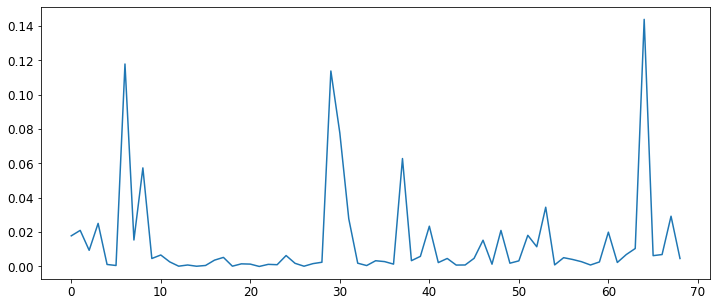

In [114]:
feature_importance = rf_reg_grid.feature_importances_
# create a basic plot - improvement , plot tge feature names on the x-axis 
plt.plot(feature_importance)

In [115]:
X_train_prepared.columns[65:70]

Index(['bsmt_fin', 'bsmt_unfin', 'total_bath_grd', 'total_bath_bsmt'], dtype='object')

### Principal Component Analysis

Dimensionality can be a curse. I tried out reducing it but only to the extent that the variance of the data should be explained by atleast 95%. This way I need not keep playing with arbitrary choice of n_components hyperparameter in PCA. 

In [116]:
# import the pca package
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_prepared)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print (f'{d}')

2


In [117]:
pca = PCA(n_components = d)
X_train_reduced = pca.fit_transform(X_train_prepared)
X_valid_reduced = pca.transform(X_valid_prepared)
X_test_reduced = pca.transform(X_test_prepared)

In [118]:
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_reduced,y_train)
valid_pred = rf_pca.predict(X_valid_reduced)
print(f'RMSE on validation data = {np.sqrt(mean_squared_error(y_valid,valid_pred))}')

RMSE on validation data = 0.33124251090350687


Reducing the dataset into its principal components does not seem to be improving the model performance on the validation dataset. Grid search can also be applied on PCA. However, I would leave out this option.

### Randomized Grid Search

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [120]:
param_distribs = {'n_estimators':randint(100,300),
                 'max_features':randint(16,67),
                 'max_depth':randint(3,6)}

In [121]:
rf_reg_rand =  RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(rf_reg_rand,param_distributions=param_distribs,cv=10,
                                 scoring='neg_mean_squared_error',random_state=42,n_iter=10)



In [122]:
rand_search.fit(X_train_prepared,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ee040ec90>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ee040bd50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8ee040be90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [123]:
rand_search.best_estimator_

RandomForestRegressor(max_depth=5, max_features=39, n_estimators=216,
                      random_state=42)

In [124]:
rf_reg_rand_best = sklearn.base.clone(rand_search.best_estimator_)

In [125]:
rf_reg_rand_best.fit(X_train_prepared,y_train)
valid_pred = rf_reg_rand_best.predict(X_valid_prepared)

In [126]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_valid,valid_pred))}')

RMSE = 0.19642564737374768


## Submission

In [127]:
final_pred = rf_reg_grid.predict(X_test_prepared)
price_arr = np.exp(final_pred)
output = pd.DataFrame({"Id":save_id['Id'], "SalePrice":price_arr})
output.to_csv('submission_rf_001.csv', index=False)